In [35]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

df = pd.read_csv('prep_data.csv')


In [ ]:
df

# Create the X_data and Y_data for the training and testing
The Y_data just has the final ratio values and X_data has all the data to do the prediction

In [45]:
y=df['completed_ratio'].values

X = df.drop(['completed_ratio'], axis=1).values


# Voting Majority
The next codes use KNN, Naive Bayes and Decision Trees in order to use a Voting Majority to optimize the accuracy

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=10

clf1 = GaussianNB()



In [47]:
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ('distance', 'uniform')})

In [48]:
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 21, 'weights': 'uniform'} Accuracy= 0.639
Accuracy: 0.464 [Naive Bayes]
Accuracy: 0.639 [Knn (3)]
Accuracy: 0.638 [Dec. Tree]


In [49]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.650 [Majority Voting]


In [50]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.666 [Weighted Voting]


# Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2=[]    
print()
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())

Accuracy: 0.637 [1]
Accuracy: 0.671 [2]
Accuracy: 0.685 [5]
Accuracy: 0.710 [10]
Accuracy: 0.729 [20]
Accuracy: 0.725 [50]
Accuracy: 0.722 [100]
Accuracy: 0.718 [200]

Accuracy: 0.579 [1]
Accuracy: 0.638 [2]
Accuracy: 0.644 [5]
Accuracy: 0.670 [10]
Accuracy: 0.686 [20]
Accuracy: 0.697 [50]
Accuracy: 0.709 [100]
Accuracy: 0.711 [200]


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.608 [1]
Accuracy: 0.649 [2]
Accuracy: 0.670 [5]
Accuracy: 0.679 [10]
Accuracy: 0.710 [20]
Accuracy: 0.698 [50]
Accuracy: 0.719 [100]
Accuracy: 0.719 [200]


In [53]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.585 [1]
Accuracy: 0.635 [2]
Accuracy: 0.644 [5]
Accuracy: 0.680 [10]
Accuracy: 0.686 [20]
Accuracy: 0.697 [50]
Accuracy: 0.708 [100]
Accuracy: 0.699 [200]


# Boosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.609 [1]
Accuracy: 0.630 [2]
Accuracy: 0.552 [5]
Accuracy: 0.550 [10]
Accuracy: 0.556 [20]
Accuracy: 0.543 [50]
Accuracy: 0.564 [100]
Accuracy: 0.601 [200]


In [55]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.685 [1]
Accuracy: 0.496 [2]
Accuracy: 0.609 [5]
Accuracy: 0.625 [10]
Accuracy: 0.638 [20]
Accuracy: 0.664 [50]
Accuracy: 0.713 [100]
Accuracy: 0.693 [200]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.621 [1]
Accuracy: 0.622 [2]
Accuracy: 0.696 [5]
Accuracy: 0.713 [10]
Accuracy: 0.723 [20]
Accuracy: 0.724 [50]
Accuracy: 0.714 [100]
Accuracy: 0.706 [200]


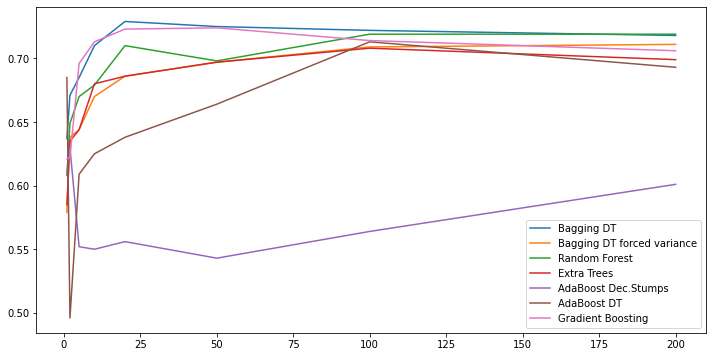

In [57]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

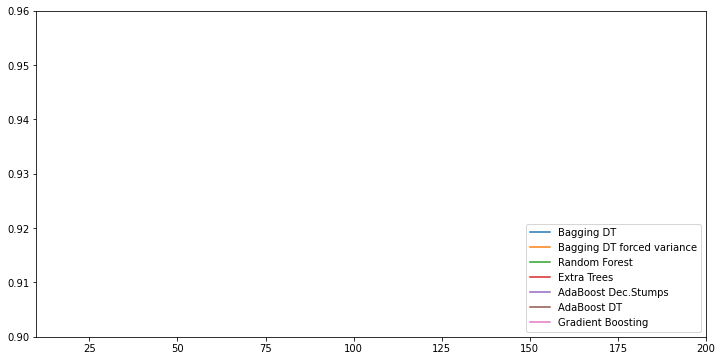

In [58]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.90,0.96)
plt.show()

# Feature Selection with Forests of trees

In [59]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[0.09041948 0.0850823  0.08340401 0.08137467 0.00795234 0.01563752
 0.0085663  0.00985707 0.00280457 0.00403347 0.00226662 0.00319621
 0.00756941 0.00271861 0.00340193 0.00670953 0.00554054 0.01146317
 0.00664941 0.00451139 0.00470481 0.00171507 0.00312342 0.00763335
 0.00446438 0.00469473 0.00737971 0.00823373 0.00331309 0.00720512
 0.00376107 0.00069364 0.00475034 0.00184053 0.00046149 0.00323815
 0.0037924  0.0036192  0.00061945 0.00248494 0.00174038 0.00435254
 0.00415313 0.00811146 0.00522618 0.00646703 0.00218971 0.00297817
 0.00412694 0.00330053 0.00064606 0.00291801 0.00231196 0.00212692
 0.00158443 0.00129173 0.00254502 0.00445268 0.00290545 0.00123947
 0.00280781 0.00447497 0.00210764 0.0032437  0.00208437 0.0058813
 0.00148467 0.00137391 0.00133753 0.00348135 0.0022977  0.00521605
 0.00448743 0.00206405 0.0018679  0.00145273 0.00171975 0.00439416
 0.0036293  0.00371489 0.00241583 0.00107142 0.00172364 0.00156604
 0.00355451 0.00145401 0.00198219 0.00313333 0.00223884 0.00321

In [60]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(1000, 4)
0.593
0.593


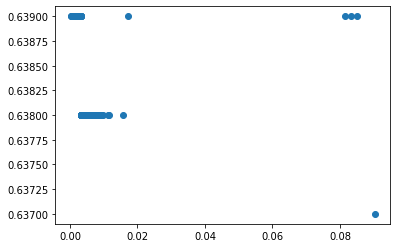

Best threshold:  0.08508229842599992


In [61]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [62]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)
print(X_new.shape)

print('Original: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X=X, y=y, cv=cv, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=cv, scoring='accuracy')))

(1000, 2)
Original:  0.5549999999999999
With FS:  0.639
